# Floral Data Processing

# **Imports**

In [1]:
#Numpy
import numpy as np
from numpy import median

#Pandas
import pandas as pd

#Seaborn
import seaborn as sns

#matplotlib
import matplotlib.pyplot as plt
import plotly

#Sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

import warnings
warnings.filterwarnings("ignore")

# **Loading Data**

In [2]:
#Loading in the data from the previous notebook
GDS = pd.read_csv('GDS')

In [3]:
#Preview of data
GDS.head()

,Order #,Transaction Type,Order Time,Order Date,Delivery Date_x,Sender,Recipient,Product Total,Delivery_x,Nontaxable Delivery,...,Billing State,Billing Zip,Subtotal,Delivery_y,Sale Tax,Tip,Discount_y,Grand Total_y,Tax Exempt,Payment Method_y
0,100017453,Sale,03:28:16PM Sat,"Dec 29, 2018","Dec 29, 2018",Candyce Williams Glaser,NaN,$815.00,$0.00,$0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100017452,Sale,03:16:50PM Sat,"Dec 29, 2018","Dec 29, 2018",NaN,NaN,$249.90,$0.00,$0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100017451,Sale,02:58:53PM Sat,"Dec 29, 2018","Dec 29, 2018",NaN,NaN,$24.95,$0.00,$0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100017450,Sale,02:54:45PM Sat,"Dec 29, 2018","Dec 29, 2018",Tracie Hamilton,NaN,$635.00,$0.00,$0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100017202,Sale,02:48:15PM Sat,"Dec 29, 2018","Dec 23, 2018",Candyce Williams Glaser,Candyce Williams Glaser,$702.00,$0.00,$25.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# **Data Exploration**

In [4]:
#Print statement containing number of total missing values
print("There are", GDS.isna().sum().sum(), "missing values.")

There are 1879164 missing values.


In [5]:
#Looking at missing calues for each column
GDS.isna().sum()

Order #                      0
Transaction Type          5449
Order Time                5449
Order Date                5449
Delivery Date_x           5458
Sender                   24781
Recipient                30983
Product Total             5449
Delivery_x                5449
Nontaxable Delivery       5449
Wire Out Fee              5449
Discount_x                5449
Gift Cards                5449
Tax                       5449
Tips                      5449
Grand Total_x             5449
Payment Method_x          5449
Order Type                5640
Order Method              5449
Order Source             47467
Sale Date                47467
Delivery Date_y          47467
Order Status             47467
Delivery Method          47467
Product Name             47467
Item Number              52778
Card Message             47671
Card Signature           49999
Occasion                 48108
Customer Name            47467
Customer Phone           47467
Customer Email           47496
Recipien

In [6]:
GDS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52916 entries, 0 to 52915
Data columns (total 55 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Order #                52916 non-null  int64  
 1   Transaction Type       47467 non-null  object 
 2   Order Time             47467 non-null  object 
 3   Order Date             47467 non-null  object 
 4   Delivery Date_x        47458 non-null  object 
 5   Sender                 28135 non-null  object 
 6   Recipient              21933 non-null  object 
 7   Product Total          47467 non-null  object 
 8   Delivery_x             47467 non-null  object 
 9   Nontaxable Delivery    47467 non-null  object 
 10  Wire Out Fee           47467 non-null  object 
 11  Discount_x             47467 non-null  object 
 12  Gift Cards             47467 non-null  object 
 13  Tax                    47467 non-null  object 
 14  Tips                   47467 non-null  object 
 15  Gr

# **Data Cleaning**

In [7]:
#Dropping unnecessary columns
columns_to_drop = ['Delivery Street 2','Billing Street 2', 'Delivery_x', 'Delivery_y', 'Discount_y', 'Discount_x', 'Card Signature', 
                   'Card Message', 'Tips', 'Tip', 'Customer Email', 'Customer Phone', 'Delivery Address Type', 'Tax Exempt', 'Grand Total_y', 
                   'Item Number', 'Billing Phone', 'Delivery State', 'Delivery Date_y', 'Payment Method_y', 'Sale Tax', 'Billing Name', 
                   'Billing Street', 'Billing City', 'Billing State', 'Billing Zip', 'Recipient Phone', 'Order Status', 'Tax']
df = GDS.drop(columns_to_drop, axis= 1)
#Preview of remaining columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52916 entries, 0 to 52915
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Order #              52916 non-null  int64  
 1   Transaction Type     47467 non-null  object 
 2   Order Time           47467 non-null  object 
 3   Order Date           47467 non-null  object 
 4   Delivery Date_x      47458 non-null  object 
 5   Sender               28135 non-null  object 
 6   Recipient            21933 non-null  object 
 7   Product Total        47467 non-null  object 
 8   Nontaxable Delivery  47467 non-null  object 
 9   Wire Out Fee         47467 non-null  object 
 10  Gift Cards           47467 non-null  object 
 11  Grand Total_x        47467 non-null  object 
 12  Payment Method_x     47467 non-null  object 
 13  Order Type           47276 non-null  object 
 14  Order Method         47467 non-null  object 
 15  Order Source         5449 non-null  

### **Changing Data Types**

In [8]:
def change_column_datatype(df, column_dict):
    """
    Change the data type of columns in a Pandas DataFrame.
    
    Parameters:
    - df: Pandas DataFrame object.
    - column_dict: Dictionary specifying column names and their desired data types.
                   Key: column name (string).
                   Value: desired data type (string).
                   Example: {'column1': 'int', 'column2': 'float', 'column3': 'datetime'}
    Returns:
    - df: Updated Pandas DataFrame with changed data types.
    """
    try:
        for column, datatype in column_dict.items():
            if datatype == 'float':
                df[column] = df[column].str.replace('$', '').str.replace(',', '').str.replace('()', '')
                df[column] = df[column].apply(lambda x: float(x.replace('(', '').replace(')', '')) if isinstance(x, str) else x)
                df[column] = df[column].replace([np.inf, -np.inf], np.nan)
            elif datatype == 'int':
                df[column] = df[column].replace(['NA', 'inf', '-inf'], np.nan)
                df[column] = df[column].astype(float).astype(pd.Int64Dtype())
            elif datatype == 'datetime':
                df[column] = pd.to_datetime(df[column], errors='coerce')
            else:
                df[column] = df[column].astype(datatype)
        return df
    except KeyError as e:
        print(f"Error: Column '{e.args[0]}' does not exist in the DataFrame.")
    except Exception as e:
        print(f"Error: {str(e)}")


In [9]:
# Print Data Frame Before Conversion 
print("Before conversion:")
print(df.dtypes)
print(df)
# Define the desired data types for columns 
column_dict = {'Product Total':'float', 'Nontaxable Delivery':'float','Wire Out Fee':'float',
              'Gift Cards':'float', 'Grand Total_x':'float', 'Order Time':'datetime', 'Order Date':'datetime',
              'Sale Date':'datetime', 'Delivery Date_x':'datetime', 'Delivery Zip':'int'}
# Call the function to change data types 
df = change_column_datatype(df, column_dict)

# Print Data Frame After Conversion 
print("\nAfter conversion")
print(df.dtypes)
print(df)

Before conversion:
Order #                  int64
Transaction Type        object
Order Time              object
Order Date              object
Delivery Date_x         object
Sender                  object
Recipient               object
Product Total           object
Nontaxable Delivery     object
Wire Out Fee            object
Gift Cards              object
Grand Total_x           object
Payment Method_x        object
Order Type              object
Order Method            object
Order Source            object
Sale Date               object
Delivery Method         object
Product Name            object
Occasion                object
Customer Name           object
Recipient Name          object
Delivery Street         object
Delivery City           object
Delivery Zip           float64
Subtotal               float64
dtype: object
          Order # Transaction Type      Order Time    Order Date  \
0       100017453             Sale  03:28:16PM Sat  Dec 29, 2018   
1       100017452        

### **Unique values**

In [10]:
# Check for unique values
unique_counts = df.nunique()
print(unique_counts)

Order #                51426
Transaction Type           3
Order Time             41876
Order Date              1683
Delivery Date_x         1724
Sender                 11032
Recipient              14112
Product Total           4419
Nontaxable Delivery      311
Wire Out Fee              39
Gift Cards                21
Grand Total_x           7999
Payment Method_x          12
Order Type                 4
Order Method               5
Order Source               4
Sale Date               1434
Delivery Method            2
Product Name             535
Occasion                  37
Customer Name           3731
Recipient Name          4406
Delivery Street         4056
Delivery City             95
Delivery Zip              35
Subtotal                 157
dtype: int64


### **Replace nans function**

In [11]:
def replace_nan(data):
    """
    Replace NaN values in a Pandas DataFrame.

    Parameters:
    - data: Pandas DataFrame object.
    
    Returns:
    - data_filled_numerical: DataFrame with filled numerical values.
    - data_filled_categorical: DataFrame with filled categorical values.
    """
# Replace NaN values with mean for numerical columns
    numerical_cols = data.select_dtypes(include=np.number).columns
    data_filled_numerical = data.copy()
    if len(numerical_cols) > 0:
        numerical_mean = data[numerical_cols].mean().round().astype(int)
        data_filled_numerical[numerical_cols] = data[numerical_cols].fillna(numerical_mean)
# Replace NaN values with mode for categorical columns
    categorical_cols = data.select_dtypes(include=['object']).columns
    data_filled_categorical = data.copy()
    if len(categorical_cols) > 0:
        categorical_mode = data[categorical_cols].mode().iloc[0]
        data_filled_categorical[categorical_cols] = data[categorical_cols].fillna(categorical_mode)
    return data_filled_numerical, data_filled_categorical

In [12]:
data = df 
# Call the function to replace NaN values
data_filled_numerical, data_filled_categorical = replace_nan(data)
# Print the filled DataFrames
print("Numerical Data:")
print(data_filled_numerical)
print("\nCategorical Data:")
print(data_filled_categorical)

Numerical Data:
          Order # Transaction Type          Order Time Order Date  \
0       100017453             Sale 2023-07-08 15:28:16 2018-12-29   
1       100017452             Sale 2023-07-08 15:16:50 2018-12-29   
2       100017451             Sale 2023-07-08 14:58:53 2018-12-29   
3       100017450             Sale 2023-07-08 14:54:45 2018-12-29   
4       100017202             Sale 2023-07-08 14:48:15 2018-12-29   
...           ...              ...                 ...        ...   
52911  2749452849              NaN                 NaT        NaT   
52912  2553412309              NaN                 NaT        NaT   
52913  3540158661              NaN                 NaT        NaT   
52914  3591549621              NaN                 NaT        NaT   
52915  7662866077              NaN                 NaT        NaT   

      Delivery Date_x                   Sender                Recipient  \
0          2018-12-29  Candyce Williams Glaser                      NaN   
1    

In [13]:
df['Delivery Zip'].value_counts()

37064    1490
37069    1403
37027     720
37067     714
37215     204
37221     170
37205     164
37204      79
37203      70
37209      59
37211      55
37212      53
37220      39
37013      31
37075      26
37207      17
37216      15
37206      15
37174      14
37076      13
37122      13
37214      12
37208      12
37138       9
37210       9
37217       8
37072       6
37228       6
37065       6
37219       5
37179       5
37218       3
37201       2
37213       1
37202       1
Name: Delivery Zip, dtype: Int64

In [14]:
df['Delivery Street'].value_counts()

2179 Hillsboro Road        241
3009 Columbia Ave           22
689 Legends Crest Dr.       21
3117 Tristan Drive          19
1007 Boxwood Drive          18
                          ... 
814 Barrington Place Dr      1
2323 C old hickory Blvd      1
2484 Santa Barbara Lane      1
211 Bedford Way              1
1824 Thornbrook Lane         1
Name: Delivery Street, Length: 4056, dtype: int64

In [15]:
df['Sale Date'].value_counts()

2020-05-06    37
2022-05-05    35
2021-05-06    29
2023-05-10    28
2019-05-10    28
              ..
2022-03-13     1
2022-03-12     1
2022-03-11     1
2022-03-07     1
2018-12-21     1
Name: Sale Date, Length: 1434, dtype: int64

In [16]:
df['Delivery Date_x'].value_counts()

2021-05-08    236
2022-05-07    215
2023-02-14    213
2019-05-11    203
2023-05-13    199
             ... 
2019-12-08      1
2022-12-24      1
2019-12-15      1
2017-12-04      1
2023-06-05      1
Name: Delivery Date_x, Length: 1724, dtype: int64

In [17]:
df['Product Name'].value_counts()

Vivid Daydream                                                                  280
Designer's Choice  75                                                           194
Mimi’s Rose Garden: Pretty in Pink Edition                                      128
Blush Designer's Choice                                                         122
CARNTON Hydrangea Cluster in white                                              121
                                                                               ... 
Mini poinsettias in Barnwood - upgrade:deluxe|Mini poinsettias in Barnwood        1
RED BIRD WINTER                                                                   1
Blush Designer's Choice - upgrade:deluxe|Peony Gathering  (Colors will vary)      1
Joy - Fall - upgrade:deluxe|Joy - Fall                                            1
Designer's Choice $250 - upgrade:premium                                          1
Name: Product Name, Length: 535, dtype: int64

In [18]:
df['Order Source'].value_counts()

Premium Site    5256
Marketplace      160
F2F               29
Yelp               4
Name: Order Source, dtype: int64

In [19]:
df['Order Type'].value_counts()

Delivery    20401
Taken       20150
Pickup       5448
Wire Out     1277
Name: Order Type, dtype: int64

In [20]:
df['Order Method'].value_counts()

Phone                            24224
Walk-In                          22430
Website                            439
Subscription / Standing Order      333
Florist-to-Florist                  41
Name: Order Method, dtype: int64

In [21]:
#df['Delivery City'].value_counts()

In [22]:
df['Delivery City'].value_counts()

Franklin           2841
Nashville           703
Brentwood           521
FRANKLIN            381
Franklin            286
                   ... 
Frankline             1
New York              1
Hendersonville        1
Old hickory           1
Frank.in              1
Name: Delivery City, Length: 95, dtype: int64

In [23]:
df['Gift Cards'].value_counts()

0.00      47432
100.00        7
50.00         7
200.00        3
20.00         2
16.46         1
6.59          1
250.00        1
70.00         1
40.00         1
39.42         1
126.21        1
59.95         1
38.14         1
154.48        1
43.79         1
49.39         1
25.00         1
74.63         1
25.37         1
71.28         1
Name: Gift Cards, dtype: int64

In [24]:
df['Nontaxable Delivery'].value_counts()

0.00     25904
12.00     6788
15.00     5171
17.95     2474
16.95     1102
         ...  
85.00        1
45.40        1
12.30        1
4.56         1
11.49        1
Name: Nontaxable Delivery, Length: 311, dtype: int64

In [25]:
df['Transaction Type'].value_counts()

Sale          46068
Adjustment      981
Refund          418
Name: Transaction Type, dtype: int64

In [26]:
print(df['Transaction Type'].head(120))

0      Sale
1      Sale
2      Sale
3      Sale
4      Sale
       ... 
115    Sale
116    Sale
117    Sale
118    Sale
119    Sale
Name: Transaction Type, Length: 120, dtype: object


# **Creating the pipeline**

In [27]:
#Validation Split
X= df.drop(columns = 'Product Total')
y = df['Product Total']

In [28]:
#Train, Test, Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [29]:
#Function for pipeline creation
def create_preprocessing_pipeline(X_train, numeric_cols, categorical_cols):
#mean imputer
    mean_imputer = SimpleImputer(strategy= 'mean')

#Scaler
    scaler = StandardScaler()

# Numeric pipeline
    numeric_pipe = make_pipeline(mean_imputer, scaler)
    numeric_pipe
    
# Define the constant imputer for categorical pipeline
    constant_imputer = SimpleImputer(strategy='constant', fill_value='missing')
    
#OneHotEncoder
    ohe =OneHotEncoder(handle_unknown='ignore', sparse=False)

# Create the numeric pipeline
    numeric_pipe = make_pipeline(mean_imputer, scaler)

# Create the categorical pipeline
    categorical_pipe = make_pipeline(constant_imputer, ohe)

# Create column selectors
    num_cols_idx = np.isin(X_train.columns, numeric_cols)
    cat_cols_idx = np.isin(X_train.columns, categorical_cols)
    
# Create tuples for preprocessing the categorical and numeric columns
    num_tuple = (numeric_pipe, num_cols_idx)
    cat_tuple = (categorical_pipe, cat_cols_idx)
    
# Create the Column Transformer
    preprocessor = make_column_transformer(num_tuple, cat_tuple, remainder='passthrough')

# Fit the transformer
    preprocessor.fit(X_train)
    
    return preprocessor

In [30]:
#Defining columns 
numeric_cols = ['Product Total', 'Grand Total']
categorical_cols = ['Transaction Type', 'Order Type']

In [31]:
preprocessor = create_preprocessing_pipeline(X_train, numeric_cols, categorical_cols)

In [32]:
X_train_preprocessed = preprocessor.transform(X_train)

TypeError: float() argument must be a string or a number, not 'NAType'

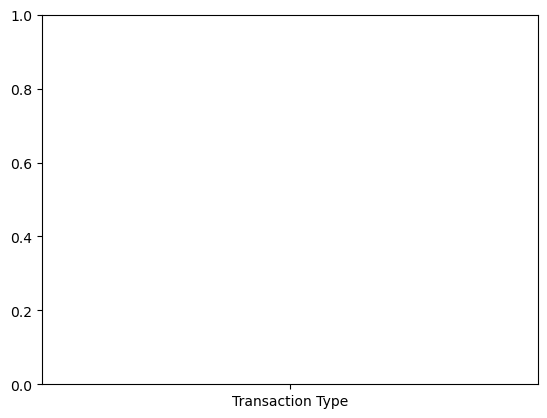

In [33]:
# Assuming X_train_preprocessed is your preprocessed data

# Extract the transformed categorical columns
categorical_data = X_train_preprocessed[:, -len(categorical_cols):]

# Calculate the sum of each category
category_sum = categorical_data.sum(axis=0)
# Create a pandas DataFrame for the bar plot
df = pd.DataFrame({'Categories': categorical_cols, 'Count': category_sum})

# Create the bar plot
plt.bar(df['Categories'], df['Count'])
# Add labels and title
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Bar Plot of Preprocessed Categorical Data')

# Rotate the x-axis labels if needed
plt.xticks(rotation=45)

# Display the plot
plt.show()

In [ ]:
# Assuming X_train_preprocessed is your preprocessed data

# Extract the transformed numeric columns
numeric_data = X_train_preprocessed[:, :len(numeric_cols)]

# Calculate the mean of each numeric column
column_means = numeric_data.mean(axis=0)
# Create a list of column names for the bar plot
column_names = ['Product Total', 'Grand Total']

# Make sure column_means is a numpy array
column_means = np.array(column_means)

# Create the bar plot
plt.bar(column_names, column_means)
# Add labels and title
plt.xlabel('Numeric Columns')
plt.ylabel('Mean Value')
plt.title('Bar Plot of Preprocessed Numeric Data')

# Rotate the x-axis labels if needed
plt.xticks(rotation=45)

# Display the plot
plt.show()